<div style="line-height:0.5">
<h1 style="color:chartreuse"> Methods trials </h1>
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> getipython + Popen + inspect.findsource(frame) + sqlite + matplotlib plot_options + BeautifulSoup
</span>
</div>

In [6]:
import os
import re
import csv
import time
import random
import inspect
import functools
from copy import copy
import sqlite3 as lite
from typing import List, Tuple
import matplotlib.pyplot as plt
from IPython.core import getipython
from subprocess import Popen, PIPE, STDOUT

In [4]:
%%script echo Skipping, since already installed
! pip install beautifulsoup4

Skipping, since already installed


In [3]:
from bs4 import BeautifulSoup

<h3 style="color:chartreuse"> => Simple function </h3>

In [ ]:
se = (['scenario_6011600760106012'],)
se2 = (['scenario_6011600760106012'], ['scenario_505'])
print(type(se))
clss_na = se.__class__.__name__
print("ecco {}",clss_na)
if clss_na=='tuple':
	print("it's a tuple!")

In [7]:
def take_given_scenario(para):
	impo_need = []
	tip = para.__class__.__name__
	if tip=='tuple':
		customized = [item for sublist in para for item in sublist]
	else:
		customized = copy(para)
	print("custom {}".format(customized))
	impo_need = []
	exact_scen_id = 0
	for x in customized:
		print(x)
		if 'scenario' in x:
			exact_scen_id = int(re.search(r'\d+', x).group())
			impo_need.append(exact_scen_id)
	return impo_need

	if 'scenario' in customized:
		print("aaaaa")
		exact_scen_id = int(re.search(r'\d+', customized).group())
	return exact_scen_id

se2 = ['scenario_22']
aa = take_given_scenario(se2)
print(aa)

abc = [1]
incc = random.randint(1, len(abc))	
print(incc)	

<class 'tuple'>
ecco {} tuple
it's a tuple!
custom ['scenario_22']
scenario_22
[22]
1


<h3 style="color:chartreuse"> => Positional and Keyword arguments (*args and **kwargs) </h3>

In [1]:
def process_data(data, **kwargs):
    """1) 
        Filter the data sequence using a lambda function that selects only the even numbers. 
        The resulting filtered_data sequence contains only the even numbers from the original data sequence.
        2)
        Maps the data sequence using a lambda function that squares each element. 
        The resulting mapped_data sequence contains the squares of the elements in the original data sequence.
        3)
        Sorts the data sequence using a key function that selects the second element of each tuple. 
        The resulting sorted_data sequence contains the tuples sorted by their second element in ascending order.
    """
    if "filter_func" in kwargs:
        data = filter(kwargs["filter_func"], data)
    if "map_func" in kwargs:
        data = map(kwargs["map_func"], data)
    if "sort_key" in kwargs:
        data = sorted(data, key=kwargs["sort_key"])
    return data

# Filter the data using a lambda function
data = [1, 2, 3, 4, 5]
filtered_data = process_data(data, filter_func=lambda x: x % 2 == 0)
print(list(filtered_data)) #convert to a list the iterator object in order to be printed
# Output: [2, 4]

# Map the data using a lambda function
data = [1, 2, 3, 4, 5]
mapped_data = process_data(data, map_func=lambda x: x ** 2)
print(list(mapped_data)) #convert to a list the iterator object in order to be printed
# Output: [1, 4, 9, 16, 25]

# Sort the data using a key function
data = [("Alice", 25), ("Bob", 20), ("Charlie", 30)]
sorted_data = process_data(data, sort_key=lambda x: x[1])
print(sorted_data)  
# Output: [("Bob", 20), ("Alice", 25), ("Charlie", 30)]

[2, 4]
[1, 4, 9, 16, 25]
[('Bob', 20), ('Alice', 25), ('Charlie', 30)]


In [61]:
def fun_forced_keywords_arg(*, a, b):
    print(a, b)

try:
    fun_forced_keywords_arg(1, 2)
except Exception as e:
    print(e)

fun_forced_keywords_arg(a=1, b=2)

fun_forced_keywords_arg() takes 0 positional arguments but 2 were given
1 2


In [65]:
def simple_f(first, second, third):
    print(first, second, third)

args = { "first": 1, "second": 2, "third": 3}
simple_f(**args)

1 2 3


In [66]:
lis = ["first","second","third"]
simple_f(*lis)

first second third


In [74]:
def concatenate_strings(*args):
    result = ""
    for arg in args:
        result += arg + ' '
    return result

concatenate_strings("Functions", "are a block of code that", "is written in a program", "so that", 
                    "they can be recalled", "multiple times")

'Functions are a block of code that is written in a program so that they can be recalled multiple times '

In [81]:
def create_phone(**kwargs):
    phone = {
        "brand": kwargs.get("brand", "Unknown"),
        "model": kwargs.get("model", "Unknown"),
        "price": kwargs.get("price", 0),
    }
    return phone

# Example usage:
phone1 = create_phone(brand="Samsung", model="Galaxy S21", price=999)
phone2 = create_phone(brand="Apple", model="iPhone 12")

print(phone1)
print(phone2)

{'brand': 'Samsung', 'model': 'Galaxy S21', 'price': 999}
{'brand': 'Apple', 'model': 'iPhone 12', 'price': 0}


In [100]:
def format_message(message, *args, **kwargs):
    """Format with optional."""
    formatted_message = message.format(*args, **kwargs)
    return formatted_message

sentence = """ If you already have experience with {name}’s programming language, go to class {count}."""
formatted = format_message(sentence, name="Python", count=3)
formatted

' If you already have experience with Python’s programming language, go to class 3.'

In [83]:
def generate_an_sql_query(table_name, *select_fields, where_clause=None, **order_by):
    query = f"SELECT {', '.join(select_fields)} FROM {table_name}"

    if where_clause:
        query += f" WHERE {where_clause}"
    if order_by:
        query += f" ORDER BY {', '.join(f'{field} {order}' for field, order in order_by.items())}"
    return query

sql_query = generate_an_sql_query("customers", "name", "email", where_clause="status='active'", order_by={"name": "ASC"})
sql_query

"SELECT name, email FROM customers WHERE status='active' ORDER BY order_by {'name': 'ASC'}"

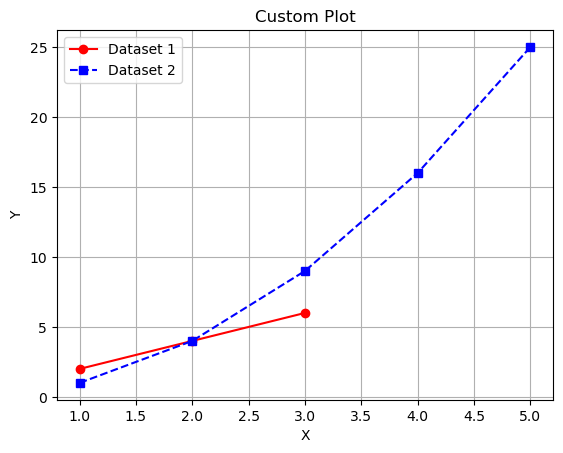

In [98]:
def plot_data(x_values, y_values, *styles, **plot_options):
    """ Plot Data with Custom Styling. """
    for i in range(len(x_values)):
        style = styles[i % len(styles)]
        plt.plot(x_values[i], y_values[i], style)

    ax = plt.gca()

    ### Set labels and title on the axes
    ax.set_xlabel(plot_options.get('xlabel', 'X-axis'))
    ax.set_ylabel(plot_options.get('ylabel', 'Y-axis'))
    ax.set_title(plot_options.get('title', 'Data Plot'))

    legend_labels = plot_options.get('legend_labels', [])
    if legend_labels:
        plt.legend(legend_labels)

    plt.grid(True)
    plt.show()

x_data = [[1, 2, 3], [1, 2, 3, 4, 5]]
y_data = [[2, 4, 6], [1, 4, 9, 16, 25]]
plot_data(x_data, y_data, 'ro-', 'bs--', xlabel='X', ylabel='Y', title='Custom Plot', legend_labels=['Dataset 1', 'Dataset 2'])


In [ ]:
def calculate_total_price(*items, discount=0, tax_rate=0):
    """ Calculate Total Price with Discounts and Taxes. """
    subtotal = sum(item['price'] * item['quantity'] for item in items)
    total_discount = subtotal * discount
    total_tax = subtotal * tax_rate
    total_price = subtotal - total_discount + total_tax
    return total_price

items = [{'name': 'Item 1', 'price': 10, 'quantity': 3}, {'name': 'Item 2', 'price': 20, 'quantity': 2}]
total = calculate_total_price(*items, discount=0.1, tax_rate=0.08)
total

In [93]:
def generate_html_table(data, headers=None, **table_attributes):
    html = "<table"
    for key, value in table_attributes.items():
        html += f' {key}="{value}"'
    html += ">"

    if headers:
        html += "<thead><tr>"
        for header in headers:
            html += f"<th>{header}</th>"
        html += "</tr></thead>"

    html += "<tbody>"
    for row in data:
        html += "<tr>"
        for cell in row:
            html += f"<td>{cell}</td>"
        html += "</tr>"

    html += "</tbody></table>"
    return html

use_this_data = [[1, 'Alice'], [2, 'Bob']]
table_html = generate_html_table(use_this_data, headers=['ID', 'Name'], border=1, cellspacing=0)
table_html


'<table border="1" cellspacing="0"><thead><tr><th>ID</th><th>Name</th></tr></thead><tbody><tr><td>1</td><td>Alice</td></tr><tr><td>2</td><td>Bob</td></tr></tbody></table>'

In [94]:
soup = BeautifulSoup(table_html, 'html.parser')
pretty_html = soup.prettify()

print(pretty_html)

<table border="1" cellspacing="0">
 <thead>
  <tr>
   <th>
    ID
   </th>
   <th>
    Name
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    1
   </td>
   <td>
    Alice
   </td>
  </tr>
  <tr>
   <td>
    2
   </td>
   <td>
    Bob
   </td>
  </tr>
 </tbody>
</table>



In [91]:
def search_and_filter(data, filter_func=None, **search_criteria):
    """ Search and Filter Data. """
    if filter_func:
        data = filter(filter_func, data)

    filtered_data = []
    for item in data:
        matches_criteria = all(item.get(key) == value for key, value in search_criteria.items())
        if matches_criteria:
            filtered_data.append(item)

    return filtered_data

data = [{'name': 'Laura', 'age': 68}, {'name': 'Antonio', 'age': 65}, {'name': 'Anna', 'age': 37}]
filt_data  = search_and_filter(data, age=37)
filt_data

[{'name': 'Anna', 'age': 37}]

In [89]:
def validate_data(data, **validation_rules):
    """ Dynamic Data Validation """
    errors = {}
    for key, rule in validation_rules.items():
        if key in data and not rule(data[key]):
            errors[key] = f"Invalid {key}"
    return errors

data = {'username': 'user123', 'email': 'user@example.com'}
rules = {'username': lambda x: len(x) >= 5, 'email': lambda x: '@' in x}
validation_errors = validate_data(data, **rules)
validation_errors

{}

<h3 style="color:chartreuse"> => Transpose matrices </h3>

In [46]:
def is_transposable(matrix):
    """ Check if all rows have the same length. """
    return all(len(row) == len(matrix[0]) for row in matrix)

def transpose_matrix(matrix):
    """ Transpose given matrix using list comprehensions and zip. """
    if matrix is None:
        raise ValueError("The matrix does not exist")
    if not is_transposable(matrix):
        raise ValueError("Pay attention! The input matrix is not transposable")    
    transposed = [list(row) for row in zip(*matrix)]
    return transposed

In [47]:
matrix1= [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
matrix2= [
    [1, 2, 3],
    [4, 5],
    [7, 8, 9, 10]
]

result1 = transpose_matrix(matrix1)
for row in result1:
    print(row)    
print()
try:
    result2 = transpose_matrix(matrix2)
except Exception as e:
    print(e)

[1, 4, 7]
[2, 5, 8]
[3, 6, 9]

Pay attention! The input matrix is not transposable


<h3 style="color:chartreuse"> => Get locals and globals </h3>

In [8]:
def print_all_variables():
    """ Get the dictionaries of local and global variables + Print the local variables + # Print the global variables. """
    local_vars = locals()
    global_vars = globals()
    print("Local variables:")
    for var_name in local_vars:
        print(f"{var_name} = {local_vars[var_name]}")
    print("Global variables:")
    for var_name in global_vars:
        print(f"{var_name} = {global_vars[var_name]}")

In [9]:
def print_cell_variables():
    """ Get the dictionary of local variables for the current cell + Print the local variables,\\
    but in Jupyter the vars declared in other cells are accessible!\\
    Local vars are not ok, I need to inspect. """
    local_vars = dict(globals(), **locals())
    cell_vars = {}
    for key, value in local_vars.items():
        if not key.startswith('_') and key not in {'In', 'Out', 'get_ipython', 'exit', 'quit'}:
            cell_vars[key] = value
    print("Local variables in the current cell:")
    for var_name in cell_vars:
        print(f"{var_name} = {cell_vars[var_name]}")

In [10]:
def print_cell_variables_onlyinside():
    """  Print content of a cell, using the 'inspect' library to get the source code for the current cell.\\
    Parse the source code to extract variable names + Get the values of the variables and print them. 
    """
    # Get the current execution frame
    frame = inspect.currentframe()
    try:
        # Get the lines of code associated with the current frame
        source = inspect.getframeinfo(frame).code_context
        # Convert the list of source lines into a single string        
        source = ''.join(source)        
    finally:
        # Ensure the frame is deleted to prevent potential reference cycles
        del frame
    
    var_names = []
    for line in source.split('\n'):
        # Check if the line contains an assignment operation
        if '=' in line:
            # Split the line where the assignment operator is, and take the variable name
            var_name = line.split('=')[0].strip()
            if var_name.isidentifier():
                # Append the variable name to the list, if it is valid
                var_names.append(var_name)
    
    local_vars = locals()
    print("Local variables in the current cell:")
    for var_name in var_names:
        if var_name in local_vars:
            print(f"{var_name} = {local_vars[var_name]}")

In [ ]:
def print_cell_variables3():
    """ Print the names and values of variables defined in the current Jupyter cell. 
    
    Notes:
        - Do not use this:\\ 
        source = "\n".join(shell.history_manager.get_range(start=source_lineno)[2])\\ 
        to avoid the "TypeError: 'generator' object is not subscriptable"
    """
    # Get the current IPython shell instance
    shell = getipython.get_ipython()
    # Retrieve the source code and line number of the current function
    _, source_lineno = inspect.getsourcelines(inspect.currentframe())
    
    # Get the source code of the last executed command in the IPython shell
    source = "\n".join(list(shell.history_manager.get_range(session=shell.execution_count))[-1][2])
        
    ########## Parse the source code to extract variable names
    var_names = []    
    # Split the source code into individual lines and process each line
    for line in source.split('\n'):
        # Check if the line contains an assignment operation
        if '=' in line:
            # Split the line at the assignment operator and take the left part (variable name)
            var_name = line.split('=')[0].strip()            
            # Append the variable name to the list only if it is valid 
            if var_name.isidentifier():
                var_names.append(var_name)
    
    # Get the local variables within the scope of this function
    local_vars = locals()
    print("Local variables in the current cell:")
    
    for var_name in var_names:
        # Check if the variable name exists in the local scope
        if var_name in local_vars:
            print(f"{var_name} = {local_vars[var_name]}")


In [12]:
def print_cell_variables4():
    """ Print the names and values of variables defined in the current scope.\\
    Use a regular expressions to parse the source code to identify variable assignments.
    """
    # Get the source code for the current frame (the context in which this function was called)
    frame = inspect.currentframe()
    try:
        # Retrieve the source lines
        source_lines, _ = inspect.findsource(frame)
    finally:
        # Ensure the frame is deleted to prevent potential reference cycles
        del frame

    # Convert the list of source lines into a single string            
    source = ''.join(source_lines)
    
    ####### Parse the source code to extract variable names
    var_names = []
    for line in source.split('\n'):
        match = re.match(r'\s*([a-zA-Z_][a-zA-Z0-9_]*)\s*=', line)
        # If a match is found, extract the variable name
        if match:
            var_name = match.group(1)
            var_names.append(var_name)
    
    ##### Get the values of the variables in the current scope and print them
    local_vars = locals()
    print("Local variables in the current cell:")
    for var_name in var_names:
        if var_name in local_vars:
            print(f"{var_name} = {local_vars[var_name]}")

In [13]:
def print_cell_variables5():
    frame = inspect.currentframe()
    try:
        source = inspect.getframeinfo(frame).code_context
        source = ''.join(source)
    finally:
        del frame
    
    ####### Parse the source code to extract variable names
    var_names = []
    for line in source.split('\n'):
        if '=' in line:
            var_name = line.split('=')[0].strip()
            if var_name.isidentifier():
                var_names.append(var_name)
    
    ##### Get the values of the variables and print them
    local_vars = locals()
    print("Local variables in the current cell:")
    for var_name in var_names:
        if var_name in local_vars:
            print(f"{var_name} = {local_vars[var_name]}")

In [14]:
def print_cell_variables6():
    frame = inspect.currentframe()
    try:
        source = inspect.getframeinfo(frame).code_context
        source = ''.join(source)
    finally:
        del frame
    
    ######## Parse the source code to extract variable names
    var_names = []
    for line in source.split('\n'):
        match = re.match(r'([a-zA-Z_][a-zA-Z0-9_]*)\s*=', line)
        if match:
            var_name = match.group(1)
            var_names.append(var_name)
    
    # Get the values of the variables
    local_vars = locals()
    print("Local variables in the current cell:")
    for var_name in var_names:
        if var_name in local_vars:
            print(f"{var_name} = {local_vars[var_name]}")

In [15]:
def cell_variables():
    frame = inspect.currentframe()
    cell = inspect.getouterframes(frame, 2)
    print("Local variables:")  
    for var in cell[1][0].f_locals: 
        print(var)   
    print("\nGlobal variables:")
    for var in cell[1][0].f_globals:
        print(var)  

In [16]:
def print_cell_locals_with_values():
    frame = inspect.currentframe()
    cell = inspect.getouterframes(frame, 2)
    print("Local variables:")  
    for var in cell[1][0].f_locals:
        value = cell[1][0].f_locals[var]
        print(f"{var}: {value}")

In [17]:
linked_match = "hello world"
a = linked_match[:-1]
b = linked_match[::-1]

In [18]:
print_all_variables() 

Local variables:
Global variables:
__name__ = __main__
__doc__ = Automatically created module for IPython interactive environment
__package__ = None
__loader__ = None
__spec__ = None
__builtin__ = <module 'builtins' (built-in)>
__builtins__ = <module 'builtins' (built-in)>
_ih = ['', 'import sqlite3 as lite\nimport os\nimport csv\nfrom subprocess import Popen, PIPE, STDOUT\nfrom typing import List, Tuple\nimport inspect\nimport re\nfrom IPython.core import getipython', 'def print_all_variables():\n    """ Get the dictionaries of local and global variables + Print the local variables + # Print the global variables"""\n    local_vars = locals()\n    global_vars = globals()\n    print("Local variables:")\n    for var_name in local_vars:\n        print(f"{var_name} = {local_vars[var_name]}")\n    print("Global variables:")\n    for var_name in global_vars:\n        print(f"{var_name} = {global_vars[var_name]}")\n\n\ndef print_cell_variables():\n    # \n    """ Get the dictionary of local v

In [19]:
print_cell_variables()

Local variables in the current cell:
open = <function open at 0x7f2a83535e10>
lite = <module 'sqlite3' from '/home/notto4/anaconda3/envs/MLearning/lib/python3.10/sqlite3/__init__.py'>
os = <module 'os' from '/home/notto4/anaconda3/envs/MLearning/lib/python3.10/os.py'>
csv = <module 'csv' from '/home/notto4/anaconda3/envs/MLearning/lib/python3.10/csv.py'>
Popen = <class 'subprocess.Popen'>
PIPE = -1
STDOUT = -2
List = typing.List
Tuple = typing.Tuple
inspect = <module 'inspect' from '/home/notto4/anaconda3/envs/MLearning/lib/python3.10/inspect.py'>
re = <module 're' from '/home/notto4/anaconda3/envs/MLearning/lib/python3.10/re.py'>
getipython = <module 'IPython.core.getipython' from '/home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/IPython/core/getipython.py'>
print_all_variables = <function print_all_variables at 0x7f2a704ba5f0>
print_cell_variables = <function print_cell_variables at 0x7f2a704ba830>
print_cell_variables_onlyinside = <function print_cell_variables_onl

In [20]:
cell_variables()

Local variables:
__name__
__doc__
__package__
__loader__
__spec__
__builtin__
__builtins__
_ih
_oh
_dh
In
Out
get_ipython
exit
quit
open
_
__
___
__vsc_ipynb_file__
_i
_ii
_iii
_i1
lite
os
csv
Popen
PIPE
STDOUT
List
Tuple
inspect
re
getipython
_i2
print_all_variables
print_cell_variables
print_cell_variables_onlyinside
print_cell_variables3
print_cell_variables4
print_cell_variables5
print_cell_variables6
cell_variables
print_cell_locals_with_values
_i3
linked_match
a
b
_i4
_i5
_5
_i6
_i7
_i8
_i9
_i10
_i11
_i12
_i13
_i14
_i15
_i16
_i17
_i18
_i19
_i20

Global variables:
__name__
__doc__
__package__
__loader__
__spec__
__builtin__
__builtins__
_ih
_oh
_dh
In
Out
get_ipython
exit
quit
open
_
__
___
__vsc_ipynb_file__
_i
_ii
_iii
_i1
lite
os
csv
Popen
PIPE
STDOUT
List
Tuple
inspect
re
getipython
_i2
print_all_variables
print_cell_variables
print_cell_variables_onlyinside
print_cell_variables3
print_cell_variables4
print_cell_variables5
print_cell_variables6
cell_variables
print_cell_locals

In [21]:
print_cell_locals_with_values()

Local variables:
__name__: __main__
__doc__: Automatically created module for IPython interactive environment
__package__: None
__loader__: None
__spec__: None
__builtin__: <module 'builtins' (built-in)>
__builtins__: <module 'builtins' (built-in)>
_ih: ['', 'import sqlite3 as lite\nimport os\nimport csv\nfrom subprocess import Popen, PIPE, STDOUT\nfrom typing import List, Tuple\nimport inspect\nimport re\nfrom IPython.core import getipython', 'def print_all_variables():\n    """ Get the dictionaries of local and global variables + Print the local variables + # Print the global variables"""\n    local_vars = locals()\n    global_vars = globals()\n    print("Local variables:")\n    for var_name in local_vars:\n        print(f"{var_name} = {local_vars[var_name]}")\n    print("Global variables:")\n    for var_name in global_vars:\n        print(f"{var_name} = {global_vars[var_name]}")\n\n\ndef print_cell_variables():\n    # \n    """ Get the dictionary of local variables for the current c

<h3 style="color:chartreuse"> => Permutations </h3>

In [50]:
def permutations(elements):
    """ Generate all permutations of a list with recursion. """
    if len(elements) == 0:
        # Base case: an empty list has one permutation
        return [[]]  

    all_perms = []
    for i, element in enumerate(elements):
        rest = elements[:i] + elements[i+1:]
        for p in permutations(rest):
            all_perms.append([element] + p)

    return all_perms

input_list = [1131, 2253, 3386]
result = permutations(input_list)
for perm in result:
    print(perm)

[1131, 2253, 3386]
[1131, 3386, 2253]
[2253, 1131, 3386]
[2253, 3386, 1131]
[3386, 1131, 2253]
[3386, 2253, 1131]


<h3 style="color:chartreuse"> => Timer decorator with context manager </h3>

In [54]:
# Decorator to measure the execution time of a function
def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"{func.__name__} took {end_time - start_time:.6f} seconds to execute")
        return result
    return wrapper

# Context manager to measure the execution time of a code block
class TimerContext:
    def __enter__(self):
        self.start_time = time.time()
        return self

    def __exit__(self, exc_type, exc_value, traceback):
        end_time = time.time()
        print(f"Code block took {end_time - self.start_time:.6f} seconds to execute")


In [53]:
@timer
def slow_function():
    time.sleep(2)

slow_function()

with TimerContext():
    for _ in range(3):
        time.sleep(1)

slow_function took 2.002008 seconds to execute
Code block took 3.003179 seconds to execute


<h3 style="color:chartreuse"> => Decorators to log function calls </h3>

In [56]:
def log_function_call(func):
    """ Logging decorator.\\
    Use functools.wraps to preserve the original function's metadata
    """
    @functools.wraps(func)
    # Define a wrapper function that replaces the original function
    def wrapper(*args, **kwargs):
        """ Return the decorated wrapper function """
        # Convert positional arguments to their string representations and join with commas
        args_str = ", ".join([repr(arg) for arg in args])
        # Convert keyword arguments to strings of the form "key=value" and join with commas
        kwargs_str = ", ".join([f"{key}={value!r}" for key, value in kwargs.items()])
        # Combine positional and keyword argument strings, filtering out empty strings
        all_args = ", ".join(filter(None, [args_str, kwargs_str]))
        
        # Log the function call with its name and arguments
        print(f"Calling {func.__name__}({all_args})")
    
        # Call the original function with the provided arguments and keyword arguments
        result = func(*args, **kwargs)        
        # Log the function return with its name and the return value
        print(f"{func.__name__} returned {result}")
        return result

    return wrapper

In [59]:
@log_function_call
def add(a, b):
    return a + b

@log_function_call
def greet(name):
    return f"Cmon, {name}!"

result = add(3, 5)
message = greet("Jimmy")


Calling add(3, 5)
add returned 8
Calling greet('Jimmy')
greet returned Cmon, Jimmy!
